In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.8, random_state=101)

In [21]:
data_dict = {'col1':data[0][:,0],'col2':data[0][:,1], 'centres':data[1]} 
d = pd.DataFrame(data=data_dict)
d.head()

,centres,col1,col2
0,3,-6.428841,10.141117
1,2,5.868679,5.201104
2,0,-0.376109,3.264279
3,2,2.166792,9.563005
4,2,5.095086,7.207527


In [15]:
data[1]

array([3, 2, 0, 2, 2, 1, 2, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 0, 1, 3, 1, 0, 0,
       1, 3, 1, 1, 0, 2, 2, 3, 1, 2, 0, 0, 3, 1, 1, 1, 2, 1, 3, 3, 3, 0, 3,
       3, 0, 1, 2, 0, 3, 2, 0, 1, 3, 0, 0, 3, 2, 1, 2, 1, 3, 2, 0, 1, 2, 2,
       1, 2, 0, 1, 3, 1, 2, 2, 0, 3, 0, 0, 1, 2, 1, 0, 0, 0, 3, 2, 1, 1, 1,
       1, 3, 0, 1, 2, 3, 1, 2, 0, 1, 0, 0, 2, 0, 1, 2, 1, 1, 0, 3, 3, 2, 1,
       2, 3, 3, 2, 3, 0, 3, 0, 3, 0, 2, 3, 0, 1, 3, 3, 3, 0, 1, 1, 3, 2, 3,
       2, 0, 1, 2, 1, 3, 3, 2, 0, 1, 3, 3, 3, 3, 0, 2, 0, 3, 2, 2, 2, 0, 2,
       0, 0, 3, 1, 3, 0, 2, 3, 0, 2, 0, 3, 3, 0, 3, 2, 2, 1, 2, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2, 1, 0])

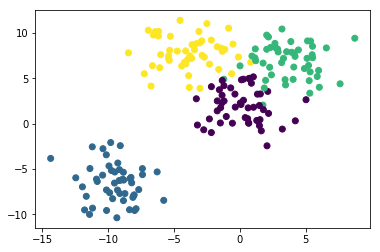

In [25]:
plt.scatter(x='col1', y='col2',data=d, c='centres')

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
kmm = KMeans(n_clusters=4, n_init=5,max_iter=10)

In [29]:
kmm.fit(d[['col1', 'col2']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10,
    n_clusters=4, n_init=5, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
print(confusion_matrix(d['centres'],kmm.labels_))

[[49  0  1  0]
 [ 0 50  0  0]
 [ 3  0 47  0]
 [ 2  0  2 46]]


In [32]:
kmm.cluster_centers_

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [ 3.71749226,  7.01388735],
       [-4.13591321,  7.95389851]])

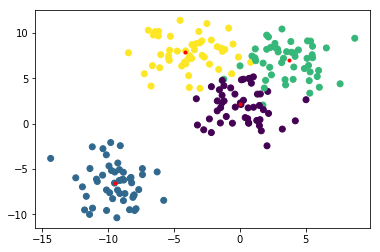

In [36]:
plt.scatter(x='col1', y='col2',data=d, c='centres')
plt.scatter(x=kmm.cluster_centers_[:,0],y=kmm.cluster_centers_[:,1], marker='.', color='red')

In [38]:
d['Pred Labels'] = kmm.labels_

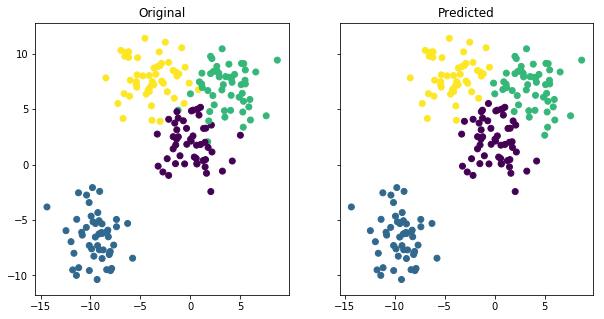

In [40]:
fig, (axis1,axis2) = plt.subplots(1,2,sharey=True,figsize=(10,5))

axis2.set_title("Predicted")
axis1.set_title("Original")

axis1.scatter(x='col1', y='col2',data=d,c='centres')
axis2.scatter(x='col1', y='col2',data=d,c='Pred Labels')
